In [2]:
# Script de unificacion de zonas pesqueras, por medio del nombre de atributo nuevo de acuerdo a su nombre de carpeta

In [21]:
import geopandas as gpd
from glob import glob
import pandas as pd

In [6]:
# Enlista directorios

carpetas = glob('./Zona de pesca en la ecorregión Golfo de California 2006/*/*')

In [7]:
carpetas

['./Zona de pesca en la ecorregión Golfo de California 2006\\Zona de pesca en la ecorregión Golfo de California 2006\\Granjas de camarón',
 './Zona de pesca en la ecorregión Golfo de California 2006\\Zona de pesca en la ecorregión Golfo de California 2006\\Zona de pesca de calamar',
 './Zona de pesca en la ecorregión Golfo de California 2006\\Zona de pesca en la ecorregión Golfo de California 2006\\Zona de pesca de crustáceos',
 './Zona de pesca en la ecorregión Golfo de California 2006\\Zona de pesca en la ecorregión Golfo de California 2006\\Zona de pesca de equinodermos',
 './Zona de pesca en la ecorregión Golfo de California 2006\\Zona de pesca en la ecorregión Golfo de California 2006\\Zona de pesca de escama',
 './Zona de pesca en la ecorregión Golfo de California 2006\\Zona de pesca en la ecorregión Golfo de California 2006\\Zona de pesca de moluscos',
 './Zona de pesca en la ecorregión Golfo de California 2006\\Zona de pesca en la ecorregión Golfo de California 2006\\Zona de pe

In [9]:
# Obtiene los nombres de las zonas de acuerdo a las carpetas, el ukltimo elemento de la lista y los guarda en una lista
zonas = []
for carpeta in carpetas:
    nombre = carpeta.split('\\')[-1]
    # EL nombre sustituye los espacios por guiones bajos
    nombre = nombre.replace(' ', '_')
    # Quita mayusculas
    nombre = nombre.lower()
    # Quita todos los acentos
    nombre = nombre.replace('á', 'a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u')
    # Quita caracteres especiales
    nombre = nombre.replace('(', '').replace(')', '').replace(',', '').replace('.', '')
    zonas.append(nombre)

print(zonas)
    

['granjas_de_camaron', 'zona_de_pesca_de_calamar', 'zona_de_pesca_de_crustaceos', 'zona_de_pesca_de_equinodermos', 'zona_de_pesca_de_escama', 'zona_de_pesca_de_moluscos', 'zona_de_pesca_de_peces_cartilaginosos', 'zona_de_pesca_de_sardina', 'zona_de_pesca_deportiva', 'zona_de_pesca_industrial_de_camaron', 'zona_de_pesca_ribereña_de_camaron', 'zona_de_productividad_primaria', 'zona_de_reclutamiento_de_sardina']


In [19]:
# Intera sobre las carpetas para abrir los shapefiles con geopandas y agregar un nuevo campo con el nombre de la zona en cada uno
zonas_shp = []
for carpeta, zona in zip(carpetas, zonas):
    # Enlista los archivos shapefile
    archivos = glob(carpeta + '\\*\\*.shp')[0]
    print(archivos)
    # Abre el shapefile
    gdf = gpd.read_file(archivos)
    # Agrega un campo con el nombre de la zona
    gdf['zona'] = zona
    # Guarda el shapefile con el nuevo campo en la misma carpeta con el subfijo _zona
    gdf.to_file(archivos.replace('.shp', '_zona.shp'))
    print('Guardado:', archivos.replace('.shp', '_zona.shp'))
    # Guarda los geoDataFrames en una lista
    zonas_shp.append(gdf)
    
    

./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Granjas de camarón\geodat-ecr-gc-gc\geodat-ecr-gc-gc.shp


d:\Archivos_de_Programa\anaconda3\envs\geomatic\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Guardado: ./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Granjas de camarón\geodat-ecr-gc-gc\geodat-ecr-gc-gc_zona.shp
./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca de calamar\geodat-ecr-gc-zpcal\geodat-ecr-gc-zpcal.shp


d:\Archivos_de_Programa\anaconda3\envs\geomatic\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Guardado: ./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca de calamar\geodat-ecr-gc-zpcal\geodat-ecr-gc-zpcal_zona.shp
./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca de crustáceos\geodat-ecr-gc-zpc\geodat-ecr-gc-zpc.shp


d:\Archivos_de_Programa\anaconda3\envs\geomatic\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Guardado: ./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca de crustáceos\geodat-ecr-gc-zpc\geodat-ecr-gc-zpc_zona.shp
./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca de equinodermos\geodat-ecr-gc-zpeq\geodat-ecr-gc-zpeq.shp
Guardado: ./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca de equinodermos\geodat-ecr-gc-zpeq\geodat-ecr-gc-zpeq_zona.shp
./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca de escama\geodat-ecr-gc-zpe\geodat-ecr-gc-zpe.shp


d:\Archivos_de_Programa\anaconda3\envs\geomatic\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
d:\Archivos_de_Programa\anaconda3\envs\geomatic\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Guardado: ./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca de escama\geodat-ecr-gc-zpe\geodat-ecr-gc-zpe_zona.shp
./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca de moluscos\geodat-ecr-gc-zpm\geodat-ecr-gc-zpm.shp


d:\Archivos_de_Programa\anaconda3\envs\geomatic\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Guardado: ./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca de moluscos\geodat-ecr-gc-zpm\geodat-ecr-gc-zpm_zona.shp
./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca de peces cartilaginosos\geodat-ecr-gc-zpcr\geodat-ecr-gc-zpcr.shp


d:\Archivos_de_Programa\anaconda3\envs\geomatic\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Guardado: ./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca de peces cartilaginosos\geodat-ecr-gc-zpcr\geodat-ecr-gc-zpcr_zona.shp
./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca de sardina\geodat-ecr-gc-zps\geodat-ecr-gc-zps.shp


d:\Archivos_de_Programa\anaconda3\envs\geomatic\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Guardado: ./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca de sardina\geodat-ecr-gc-zps\geodat-ecr-gc-zps_zona.shp
./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca deportiva\geodat-ecr-gc-zpd\geodat-ecr-gc-zpd.shp
Guardado: ./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca deportiva\geodat-ecr-gc-zpd\geodat-ecr-gc-zpd_zona.shp
./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca industrial de camarón\geodat-ecr-gc-zpca\geodat-ecr-gc-zpca.shp
Guardado: ./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca industrial de camarón\geodat-ecr-gc-zpca\geodat-ecr-gc-zpca_zona.shp
./Zona de pesca en la ecorregión Gol

d:\Archivos_de_Programa\anaconda3\envs\geomatic\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
d:\Archivos_de_Programa\anaconda3\envs\geomatic\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
d:\Archivos_de_Programa\anaconda3\envs\geomatic\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Guardado: ./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca ribereña de camarón\geodat-ecr-gc-zpcrib\geodat-ecr-gc-zpcrib_zona.shp
./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de productividad primaria\geodat-ecr-gc-zep\geodat-ecr-gc-zep.shp


d:\Archivos_de_Programa\anaconda3\envs\geomatic\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Guardado: ./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de productividad primaria\geodat-ecr-gc-zep\geodat-ecr-gc-zep_zona.shp
./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de reclutamiento de sardina\geodat-ecr-gc-zrs\geodat-ecr-gc-zrs.shp


d:\Archivos_de_Programa\anaconda3\envs\geomatic\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Guardado: ./Zona de pesca en la ecorregión Golfo de California 2006\Zona de pesca en la ecorregión Golfo de California 2006\Zona de reclutamiento de sardina\geodat-ecr-gc-zrs\geodat-ecr-gc-zrs_zona.shp


               LAYER       DESCRIPCIO     ID        AREA  PERIMETER  HECTARES  \
0  Unknown Area Type  Granja Acuicola  147.0  539501.341   4224.078    53.950   
1  Unknown Area Type  Granja Acuicola  147.0    6833.459    642.902     0.683   
2  Unknown Area Type  Granja Acuicola  147.0    1455.501    189.987     0.146   
3  Unknown Area Type  Granja Acuicola  147.0    7239.998    405.641     0.724   
4  Unknown Area Type  Granja Acuicola  147.0    8383.641    362.713     0.838   

                                          REFERENCIA  COSTO  \
0  Foto interpretacion y proceso de imagenes de s...  142.0   
1  Foto interpretacion y proceso de imagenes de s...  142.0   
2  Foto interpretacion y proceso de imagenes de s...  142.0   
3  Foto interpretacion y proceso de imagenes de s...  142.0   
4  Foto interpretacion y proceso de imagenes de s...  142.0   

                                            geometry                zona  ...  \
0  POLYGON ((-110.86931 27.97953, -110.86331 27.9... 

d:\Archivos_de_Programa\anaconda3\envs\geomatic\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

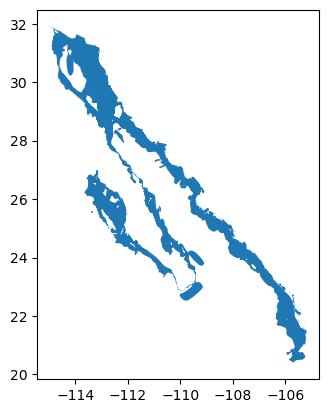

In [22]:
# Une todos los shapefiles en un solo geoDataFrame
gdf = gpd.GeoDataFrame(pd.concat(zonas_shp))

# Imprme el geoDataFrame
print(gdf.head())

# Plotea el geoDataFrame
gdf.plot()

In [23]:
import os
# Crear un nuevo directorio para guardar los shapefiles unidos
os.makedirs('ZPE_GCal_2006', exist_ok=True)
# Guarda el geoDataFrame en un archivo shapefile dentro del nuevo directorio
gdf.to_file('ZPE_GCal_2006/ZPE_GCal_2006.shp')

d:\Archivos_de_Programa\anaconda3\envs\geomatic\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
